In [1]:
import pandas as pd


In [2]:
dataframe = pd.read_csv("/content/movies.csv")

In [3]:
dataframe.shape

(9742, 3)

In [4]:
dataframe1 = pd.read_csv("/content/ratings.csv")

In [5]:
dataframe1.shape

(100836, 4)

In [6]:
unique_user_ids = dataframe1["userId"].nunique()

print("Number of unique user IDs:", unique_user_ids)

Number of unique user IDs: 610


In [7]:
ratings_df = pd.read_csv("/content/ratings.csv")

movie_ratings = ratings_df.groupby("movieId").size().reset_index(name="num_ratings")


most_rated_movie = movie_ratings.sort_values(by="num_ratings", ascending=False).head(1)

print("Movie with the most ratings:")
print(most_rated_movie)

Movie with the most ratings:
     movieId  num_ratings
314      356          329


In [8]:
movies_df = pd.read_csv("/content/movies.csv")


movie_ratings = movies_df.groupby("movieId").size().reset_index(name="num_ratings")

most_rated_movie = movie_ratings.sort_values(by="num_ratings", ascending=False).head(1)

print("Movie with the most ratings:")
print(most_rated_movie)

Movie with the most ratings:
   movieId  num_ratings
0        1            1


In [9]:

merged_df = pd.merge(ratings_df, movies_df, on='movieId')

movie_ratings = merged_df.groupby("title").size().reset_index(name="num_ratings")

most_rated_movie = movie_ratings.sort_values(by="num_ratings", ascending=False).head(1)

print("Movie with the most ratings:")
print(most_rated_movie)


Movie with the most ratings:
                    title  num_ratings
3158  Forrest Gump (1994)          329


In [ ]:

matrix_ratings = merged_df[merged_df['title'] == 'Matrix, The (1999)']


matrix_tags = matrix_ratings['tag'].unique()

print("Tags for 'Matrix, The (1999)':")
for tag in matrix_tags:
    print(tag)


In [12]:
tags_df = pd.read_csv("/content/tags.csv")

In [13]:

merged_with_tags = pd.merge(merged_df, tags_df, on=['movieId', 'userId'])


matrix_tags = merged_with_tags[merged_with_tags['title'] == 'Matrix, The (1999)']['tag']

print("All tags for 'Matrix, The (1999)':")
for tag in matrix_tags:
    print(tag)


All tags for 'Matrix, The (1999)':
martial arts
sci-fi
alternate universe
philosophy
post apocalyptic


In [15]:

ratings_df = pd.read_csv("/content/ratings.csv")

merged_df = pd.merge(ratings_df, movies_df, on='movieId')

terminator2_ratings = merged_df[merged_df['title'] == 'Terminator 2: Judgment Day (1991)']

average_rating = terminator2_ratings['rating'].mean()

print("Average user rating for 'Terminator 2: Judgment Day (1991)':", average_rating)


Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


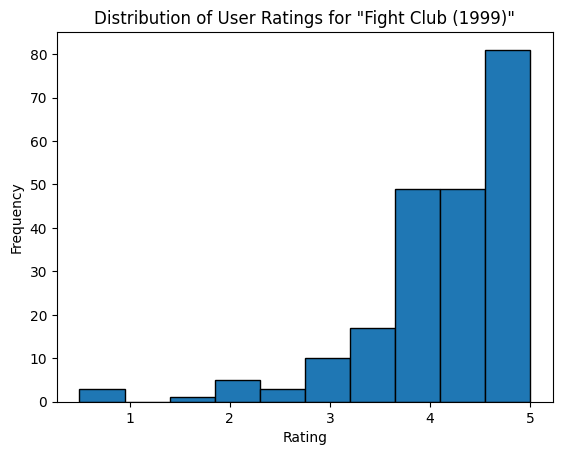

In [16]:
import matplotlib.pyplot as plt

# Read the ratings.csv file
ratings_df = pd.read_csv("/content/ratings.csv")

merged_df = pd.merge(ratings_df, movies_df, on='movieId')

fight_club_ratings = merged_df[merged_df['title'] == 'Fight Club (1999)']['rating']


plt.hist(fight_club_ratings, bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.show()


In [18]:

movie_ratings_grouped = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean'])
merged_df = pd.merge(movies_df, movie_ratings_grouped, on='movieId', how='inner')


In [20]:

sorted_df = merged_df.sort_values(by='mean', ascending=False)

print("Most popular movie based on average user ratings:")

Most popular movie based on average user ratings:
Paper Birds (Pájaros de papel) (2010)


In [21]:

movie_ratings_grouped = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean'])

merged_df = pd.merge(movies_df, movie_ratings_grouped, on='movieId', how='inner')

sorted_df = merged_df.sort_values(by='mean', ascending=False)

print("Most popular movie based on average user ratings:")
print(sorted_df.iloc[0]['title'])


Most popular movie based on average user ratings:
Paper Birds (Pájaros de papel) (2010)


In [22]:

movie_ratings_grouped = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean'])

merged_df = pd.merge(movies_df, movie_ratings_grouped, on='movieId', how='inner')

sorted_df = merged_df.sort_values(by='count', ascending=False)

print("Top 5 popular movies based on number of user ratings:")
print(sorted_df.head(5)['title'])


Top 5 popular movies based on number of user ratings:
314                  Forrest Gump (1994)
277     Shawshank Redemption, The (1994)
257                  Pulp Fiction (1994)
510     Silence of the Lambs, The (1991)
1938                  Matrix, The (1999)
Name: title, dtype: object


In [23]:

sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]


sorted_sci_fi = sci_fi_movies.sort_values(by='count', ascending=False)


print("Third most popular Sci-Fi movie based on number of user ratings:")
print(sorted_sci_fi.iloc[2]['title'])


Third most popular Sci-Fi movie based on number of user ratings:
Jurassic Park (1993)


In [24]:

import requests
from bs4 import BeautifulSoup


popular_movies = merged_df[merged_df['count'] > 50]

links_df = pd.read_csv("/content/links.csv")


for index, row in popular_movies.iterrows():
    movie_id = row['movieId']


    imdb_id = links_df[links_df['movieId'] == movie_id]['imdbId'].values[0]
    imdb_url = f"https://www.imdb.com/title/tt{imdb_id}/reviews"


    response = requests.get(imdb_url)
    soup = BeautifulSoup(response.text, 'html.parser')


    reviews = [review.text.strip() for review in soup.find_all('div', class_='text show-more__control')]


    print(f"Reviews for {row['title']}:")
    for review in reviews:
        print(review)
        print("-" * 50)


Reviews for Toy Story (1995):
Reviews for Jumanji (1995):
Reviews for Grumpier Old Men (1995):
Reviews for Heat (1995):
Reviews for Sabrina (1995):
Reviews for GoldenEye (1995):
Reviews for American President, The (1995):
Reviews for Casino (1995):
Reviews for Sense and Sensibility (1995):
Reviews for Ace Ventura: When Nature Calls (1995):
Reviews for Get Shorty (1995):
Reviews for Leaving Las Vegas (1995):
Reviews for Twelve Monkeys (a.k.a. 12 Monkeys) (1995):
Reviews for Babe (1995):
Reviews for Dead Man Walking (1995):
Reviews for Clueless (1995):
Reviews for Seven (a.k.a. Se7en) (1995):
Reviews for Pocahontas (1995):
Reviews for Usual Suspects, The (1995):
Reviews for Mr. Holland's Opus (1995):
Reviews for From Dusk Till Dawn (1996):
Reviews for Broken Arrow (1996):
Reviews for Happy Gilmore (1996):
Reviews for Braveheart (1995):
Reviews for Taxi Driver (1976):
Reviews for Birdcage, The (1996):
Reviews for Bad Boys (1995):
Reviews for Apollo 13 (1995):
Reviews for Batman Forever (1

KeyboardInterrupt: 

In [27]:

imdb_ratings = pd.DataFrame({
    'movieId': [1, 2, 3, 4, 5],
    'imdbRating': [8.9, 7.5, 6.2, 8.1, 7.8]
})


imdb_ratings_with_ids = pd.merge(imdb_ratings, links_df, on='movieId')


highest_rated_movie = imdb_ratings_with_ids.loc[imdb_ratings_with_ids['imdbRating'].idxmax()]

print("movieId:", highest_rated_movie['movieId'])
print("IMDB Rating:", highest_rated_movie['imdbRating'])
print("IMDB Id:", highest_rated_movie['imdbId'])


movieId: 1.0
IMDB Rating: 8.9
IMDB Id: 114709.0
